In [43]:
import pandas as pd
import numpy as np
from dask import dataframe as dd
from dask.distributed import Client
from sklearn.utils import shuffle
from sklearn import preprocessing
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
def readCSV_Function(file_path):
    dask_df = dd.read_csv(file_path, blocksize=1e6)
    dask_df = dask_df.repartition(npartitions=8)
    return dask_df.compute(scheduler='threads')

filePath = "D:\\Thesis_Group_of_Brig_Gen_Razzak_Sir\\Concatenated_Data_Before_Feature_Engineering\\Cleaned_Data.csv"
df = readCSV_Function(filePath)
df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
df = shuffle(df)

In [45]:
df.nunique()

Protocol                         3
Flow Duration               143257
Total Fwd Packets              365
Total Backward Packets         140
Fwd Packets Length Total      2625
                             ...  
Idle Mean                    65588
Idle Std                     52351
Idle Max                     65560
Idle Min                     65445
Label                           13
Length: 78, dtype: int64

#### Dropping categorical columns that have one category predominance

In [46]:
unique_value_columns = [col for col in df.columns if df[col].nunique() == 1]
unique_value_columns

['Bwd PSH Flags',
 'Fwd URG Flags',
 'Bwd URG Flags',
 'FIN Flag Count',
 'PSH Flag Count',
 'ECE Flag Count',
 'Fwd Avg Bytes/Bulk',
 'Fwd Avg Packets/Bulk',
 'Fwd Avg Bulk Rate',
 'Bwd Avg Bytes/Bulk',
 'Bwd Avg Packets/Bulk',
 'Bwd Avg Bulk Rate']

#### Performing drop operation & saving that in new csv

In [47]:
df.drop(columns=unique_value_columns, inplace=True)
df.shape

(409000, 66)

def dataCleaningResultToAnotherCSV(dataFrameArg, dirPath, file_name):
    dataFrameArg.to_csv(dirPath + file_name)

newCsvPath = "D:\\Thesis_Group_of_Brig_Gen_Razzak_Sir\\After_Column_Data_Cleaning\\"
csvFileName = "after_dropping_unique_data_containing_features.csv"
dataCleaningResultToAnotherCSV(dataFrameArg=df, dirPath=newCsvPath, file_name=csvFileName)

#### As we visualized the heatmap of the remaining 66 features, now need to find out the co-relation pairs
#### But Before that, need to apply encoding of categorical data, such as "Label" feature

In [48]:
le = preprocessing.LabelEncoder()
before_encoding_dataframe = df.copy(deep=True)
before_encoding_dataframe.head(5) # see the Label feature

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
424,17,10439,200,0,88000.0,0.0,440.0,440.0,440.0,0.000000,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DrDoS_NTP
1419,17,1,2,0,866.0,0.0,433.0,433.0,433.0,0.000000,...,617,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DrDoS_MSSQL
626,17,106895,4,0,1438.0,0.0,389.0,330.0,359.5,34.063667,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DrDoS_SSDP
960,17,287,2,0,2944.0,0.0,1472.0,1472.0,1472.0,0.000000,...,14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DrDoS_LDAP
2166,17,2996838,4,0,2064.0,0.0,516.0,516.0,516.0,0.000000,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TFTP


In [49]:
df["Label"] = le.fit_transform(df["Label"])
df["Label"] = pd.to_numeric(df['Label'], downcast='integer')
df.head(5) # see the Label feature

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
424,17,10439,200,0,88000.0,0.0,440.0,440.0,440.0,0.000000,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
1419,17,1,2,0,866.0,0.0,433.0,433.0,433.0,0.000000,...,617,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
626,17,106895,4,0,1438.0,0.0,389.0,330.0,359.5,34.063667,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
960,17,287,2,0,2944.0,0.0,1472.0,1472.0,1472.0,0.000000,...,14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2166,17,2996838,4,0,2064.0,0.0,516.0,516.0,516.0,0.000000,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10


<center><h3 style="background:#FF00FF;color:black">
Encoding of "Label" visualization
</h3></center>

In [50]:
Label_keys = list(before_encoding_dataframe.Label)
Label_values = list(df.Label)
# Label_tuples = list(zip(Label_keys,Label_values)) # # creating tuples from above two lists
# Label_visualize_df = pd.DataFrame(Label_tuples, columns=['Label','Encoding'])
Label_dict = dict(Label = Label_keys,Encoding = Label_values)
Label_visualize_df = pd.DataFrame.from_dict(Label_dict)
Label_visualize_df.drop_duplicates(inplace=True)
Label_visualize_df.reset_index(inplace=True, drop=True)
Label_visualize_df

,Label,Encoding
0,DrDoS_NTP,4
1,DrDoS_MSSQL,3
2,DrDoS_SSDP,7
3,DrDoS_LDAP,2
4,TFTP,10
5,DrDoS_DNS,1
6,DrDoS_UDP,8
7,DrDoS_SNMP,6
8,Syn,9
9,DrDoS_NetBIOS,5


<center><h4 style="background:#ADFF2F;color:black">
Saving the after encoding dataframe into new csv
</h4></center>

In [51]:
# dirPath = "D:\\Thesis_Group_of_Brig_Gen_Razzak_Sir\\After_Column_Data_Cleaning\\"
# csvFileName = "After_Label_Encoding.csv"
# encodingFileName = "Label_Encoding.csv"
#
# Label_visualize_df.to_csv(dirPath+encodingFileName)
# df.to_csv(dirPath + csvFileName)
# df.info(memory_usage="deep")

<center><h3 style="background:orange;color:black">
Hypothesis Testing
</h3></center>

##### Null Hypothesis(H0): There exists no co-relation between two features
##### Alternative Hypothesis (H1): opposite of null hypothesis

<center><h3 style="background:yellow;color:black">
Chi-Squared Test
</h3></center>

In [52]:
from scipy.stats import chi2_contingency
def chi_squared_test(feature1,feature2):
    stat ,p, dof, expected = chi2_contingency(pd.crosstab(feature1,feature2))
    alpha = 0.05
    if p > alpha:
        return f"They are independent & P-value: {p}"
    else:
        return f"Co-related & P-value: {p}"

In [53]:
present_columns = sorted(df)
present_columns

['ACK Flag Count',
 'Active Max',
 'Active Mean',
 'Active Min',
 'Active Std',
 'Avg Bwd Segment Size',
 'Avg Fwd Segment Size',
 'Avg Packet Size',
 'Bwd Header Length',
 'Bwd IAT Max',
 'Bwd IAT Mean',
 'Bwd IAT Min',
 'Bwd IAT Std',
 'Bwd IAT Total',
 'Bwd Packet Length Max',
 'Bwd Packet Length Mean',
 'Bwd Packet Length Min',
 'Bwd Packet Length Std',
 'Bwd Packets Length Total',
 'Bwd Packets/s',
 'CWE Flag Count',
 'Down/Up Ratio',
 'Flow Bytes/s',
 'Flow Duration',
 'Flow IAT Max',
 'Flow IAT Mean',
 'Flow IAT Min',
 'Flow IAT Std',
 'Flow Packets/s',
 'Fwd Act Data Packets',
 'Fwd Header Length',
 'Fwd IAT Max',
 'Fwd IAT Mean',
 'Fwd IAT Min',
 'Fwd IAT Std',
 'Fwd IAT Total',
 'Fwd PSH Flags',
 'Fwd Packet Length Max',
 'Fwd Packet Length Mean',
 'Fwd Packet Length Min',
 'Fwd Packet Length Std',
 'Fwd Packets Length Total',
 'Fwd Packets/s',
 'Fwd Seg Size Min',
 'Idle Max',
 'Idle Mean',
 'Idle Min',
 'Idle Std',
 'Init Bwd Win Bytes',
 'Init Fwd Win Bytes',
 'Label',
 'P

##### Relation between Syn Flag count vs Protocol

In [54]:
pd.crosstab(df['SYN Flag Count'],df['Protocol'])

Protocol,0,6,17
SYN Flag Count,,,
0,344,76009,332533
1,0,114,0


In [55]:
chi_squared_test(df['SYN Flag Count'],df['Protocol'])

'Co-related & P-value: 5.24843500768918e-109'

##### Relation between RST Flag count vs Protocol

In [56]:
pd.crosstab(df['RST Flag Count'],df['Protocol'])

Protocol,0,6,17
RST Flag Count,,,
0,344,75097,332533
1,0,1026,0


In [57]:
chi_squared_test(df['RST Flag Count'],df['Protocol'])

'Co-related & P-value: 0.0'

##### Relation between CWE Flag count vs Protocol

In [58]:
pd.crosstab(df['CWE Flag Count'],df['Protocol'])

Protocol,0,6,17
CWE Flag Count,,,
0,344,73778,332533
1,0,2345,0


In [59]:
chi_squared_test(df['CWE Flag Count'],df['Protocol'])

'Co-related & P-value: 0.0'

##### Relation between URG Flag count vs Protocol

In [60]:
pd.crosstab(df['URG Flag Count'],df['Protocol'])

Protocol,0,6,17
URG Flag Count,,,
0,344,71593,332533
1,0,4530,0


In [61]:
chi_squared_test(df['URG Flag Count'],df['Protocol'])

'Co-related & P-value: 0.0'

<center><h3 style="background:yellow;color:black">
T Test
</h3></center>

In [62]:
from scipy.stats import ttest_ind
def t_value_test(feature1,feature2):
    score = ttest_ind(feature1,feature2,equal_var=False)[1]
    if score > 0.05:
        return f"Co-related & T-score: {score}"
    return f"They are independent & T-score: {score}"

##### Relation between Flow Duration vs FWD IAT Total

In [63]:
t_value_test(df['Flow Duration'],df['Fwd IAT Total'])

'Co-related & T-score: 0.8868497655037039'

<center><h3 style="background:yellow;color:black">
Pearson co-variance implementation
</h3></center>

In [64]:
Pearson_Threshold = 0.9
count = 0
for i in df.columns:
   for j in df.columns:
       if i!= j:
           corr,_ = stats.pearsonr(df[i],df[j])
           if corr >= Pearson_Threshold:
               count = count + 1
               print(f"Pearson co-relation between {i} & {j} : {corr:.3f}")

print("\n###########################################################################")
print(f"Found above pearson threshold co-related pairs: {count}")

Pearson co-relation between Flow Duration & Fwd IAT Total : 1.000
Pearson co-relation between Total Fwd Packets & Subflow Fwd Packets : 1.000
Pearson co-relation between Total Backward Packets & Subflow Bwd Packets : 1.000
Pearson co-relation between Fwd Packets Length Total & Subflow Fwd Bytes : 1.000
Pearson co-relation between Fwd Packets Length Total & Fwd Act Data Packets : 0.997
Pearson co-relation between Bwd Packets Length Total & Subflow Bwd Bytes : 1.000
Pearson co-relation between Fwd Packet Length Max & Fwd Packet Length Min : 0.987
Pearson co-relation between Fwd Packet Length Max & Fwd Packet Length Mean : 0.995
Pearson co-relation between Fwd Packet Length Max & Packet Length Min : 0.986
Pearson co-relation between Fwd Packet Length Max & Packet Length Max : 0.979
Pearson co-relation between Fwd Packet Length Max & Packet Length Mean : 0.995
Pearson co-relation between Fwd Packet Length Max & Avg Packet Size : 0.986
Pearson co-relation between Fwd Packet Length Max & Avg

<center><h3 style="background:orange;color:black">
Need to reduce dimentionality of those above co-related pairs using PCA
</h3></center>

##### But before applying PCA, need to data standardization & Compute the covariance matrix

In [65]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

X_std = StandardScaler().fit_transform(df) # data standardized / scaled here
X_norm = preprocessing.normalize(df)
mean_vec = np.mean(X_std,axis=0)
cov_mat = ((X_std - mean_vec).T.dot(X_std - mean_vec)) / (X_std.shape[0]-1)
cov_mat # 66 rows & 66 columns

array([[ 1.00000244, -0.7531957 , -0.06263539, ..., -0.75308395,
        -0.63974858, -0.43794953],
       [-0.7531957 ,  1.00000244, -0.00272005, ...,  0.8703841 ,
         0.64706931,  0.37749434],
       [-0.06263539, -0.00272005,  1.00000244, ..., -0.00814798,
        -0.00761259, -0.02526513],
       ...,
       [-0.75308395,  0.8703841 , -0.00814798, ...,  1.00000244,
         0.88018429,  0.38636973],
       [-0.63974858,  0.64706931, -0.00761259, ...,  0.88018429,
         1.00000244,  0.3459005 ],
       [-0.43794953,  0.37749434, -0.02526513, ...,  0.38636973,
         0.3459005 ,  1.00000244]])

#### Eigen decomposition of co-variance matrix

In [66]:
eig_values, eigen_vec = np.linalg.eig(cov_mat)
print(f"Eigen Vectors of co-variance matrix:\n {eigen_vec}")
print("\n###################################################################\n")
print(f"Eigen values of co-variance matrix:\n {eig_values}")

Eigen Vectors of co-variance matrix:
 [[-2.05454278e-01+0.j -6.45378474e-03+0.j  5.70199983e-02+0.j ...
   1.34895744e-14+0.j -2.50883566e-14+0.j  3.23339678e-14+0.j]
 [ 2.04908583e-01+0.j -3.78796076e-02+0.j -1.32903200e-01+0.j ...
  -6.70459584e-15+0.j -3.19595293e-12+0.j -3.79987111e-13+0.j]
 [ 2.31937691e-03+0.j  1.00417961e-02+0.j  1.25317518e-02+0.j ...
   1.03016474e-01+0.j -2.60564342e-01+0.j  1.06855051e-01+0.j]
 ...
 [ 2.19464811e-01+0.j -4.97904868e-02+0.j -1.50166961e-01+0.j ...
  -9.53636418e-15+0.j -5.88352991e-14+0.j  2.50793949e-14+0.j]
 [ 1.94389440e-01+0.j -3.82159303e-02+0.j -1.31065048e-01+0.j ...
   1.50955131e-14+0.j -1.29961877e-14+0.j  1.67119441e-14+0.j]
 [ 1.36203332e-01+0.j -4.44433655e-02+0.j  5.54129387e-02+0.j ...
   4.34501197e-15+0.j  1.71505734e-14+0.j  6.44221347e-15+0.j]]

###################################################################

Eigen values of co-variance matrix:
 [ 1.64753971e+01+0.00000000e+00j  6.84879341e+00+0.00000000e+00j
  5.932730

#### Now need to select the principal components

In [67]:
eig_pairs = [(np.abs(eig_values[i]),eigen_vec[:,i]) for i in range(len(eig_values))]
# here, eig_pairs data_types are list of tuples(eig_values,eigen_vec)
# need to sort in descending order
eig_pairs.sort(key=lambda x: x[0],reverse=True)
# ok need to visualize the descending sort of eigen pairs
for i,j in enumerate(eig_pairs):
    print(i,j[0])

0 16.475397052151536
1 6.848793408416326
2 5.932730965636064
3 3.5930312909164726
4 3.090984835001137
5 3.015878860916776
6 2.6123877779519598
7 2.489698726025652
8 2.009595371766422
9 1.99746439929715
10 1.9302519052437037
11 1.8376504960534152
12 1.2849150460412355
13 1.2385465718502515
14 1.1484801194209706
15 1.1241359618594624
16 1.0254346544512147
17 0.9818929539502065
18 0.957097353816934
19 0.8990151404665104
20 0.8389531283311615
21 0.7735005532368856
22 0.6958247885763191
23 0.6010350671488298
24 0.5284440022068849
25 0.36686652282530813
26 0.32342648013438313
27 0.29849673402195487
28 0.23031009938556765
29 0.21510660932657397
30 0.14903006298668067
31 0.12098494397156988
32 0.09442751866156107
33 0.08381812838506367
34 0.041714133397904946
35 0.03667219192301318
36 0.022333565592597228
37 0.021657902940910006
38 0.01722616501842631
39 0.011579697284044711
40 0.007177594391862743
41 0.005637200899545507
42 0.00414726451950179
43 0.003907413060414472
44 0.002935429285088872
4

##### after 55, it seems it has too little insignificance

##### Explained Variance

In [68]:
tot = sum(eig_values)
exp_var = [(i/tot)*100 for i in sorted(eig_values,reverse=True)]
# exp_var

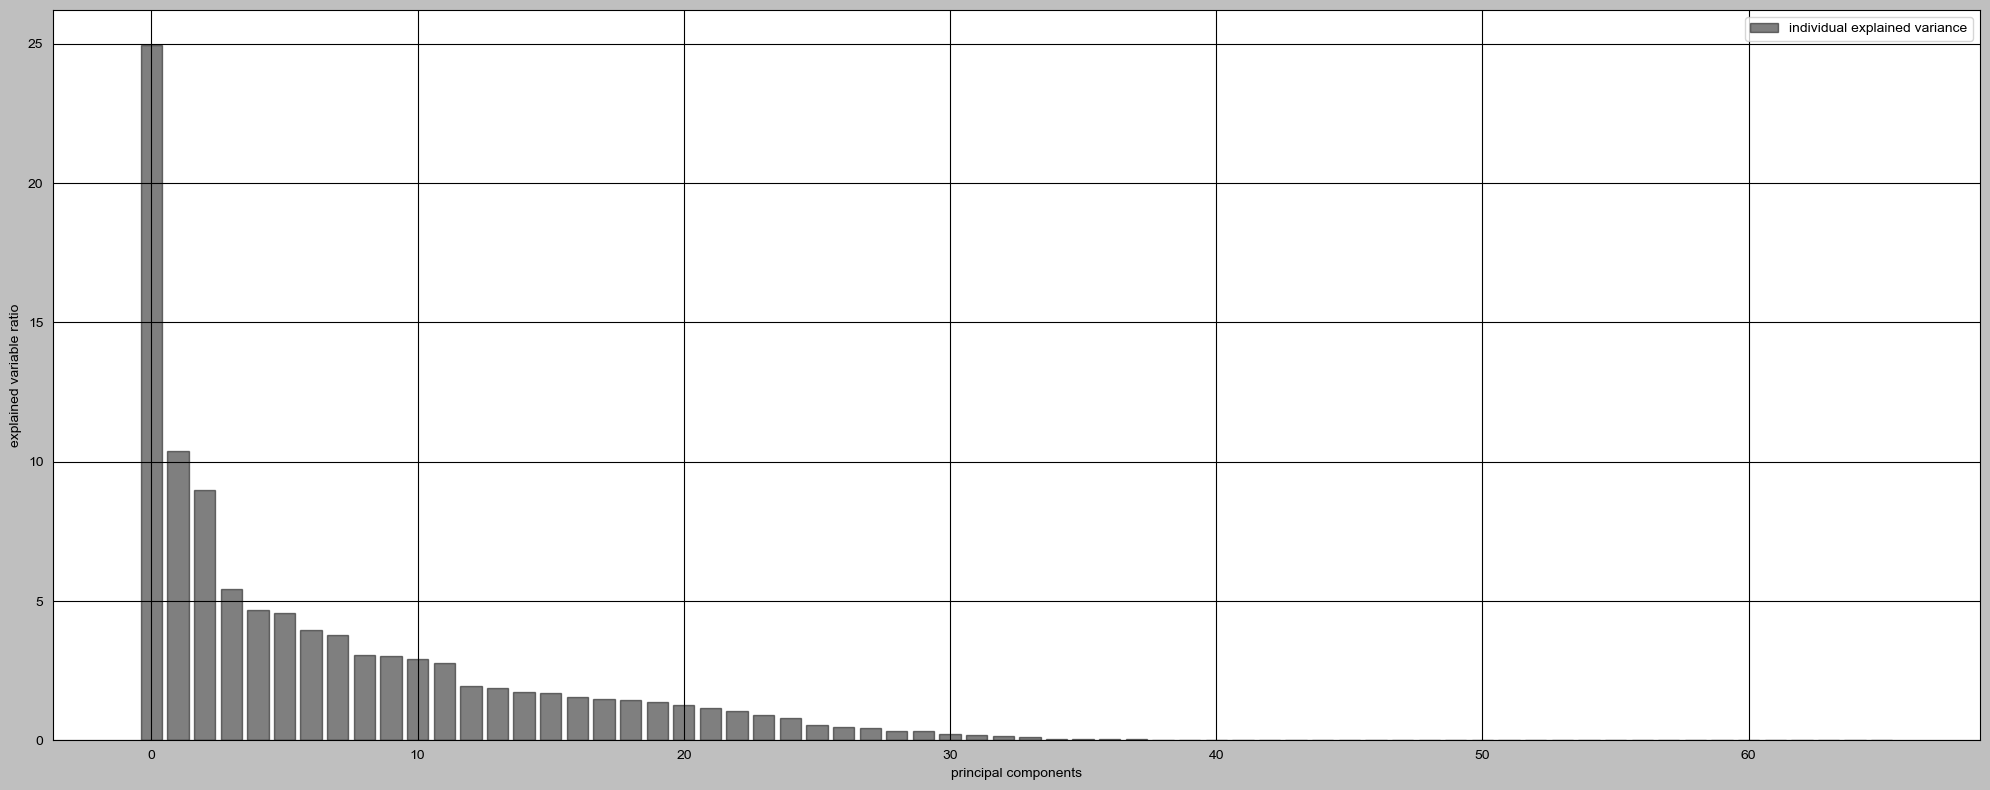

In [69]:
imgPath = "G:\\Brig_Gen_Razzak_Sir_Thesis_Group\\Thesis-on-DDOS-main\\images\\"
imgName = "PCA_explained_variance.png"
with plt.style.context(style="grayscale"):
    plt.figure(figsize=(20,8))
    plt.bar(x=range(len(df.columns)),height=exp_var,alpha=0.5,align="center",label="individual explained variance")
    plt.legend(loc="best")
    plt.xlabel("principal components")
    plt.ylabel("explained variable ratio")
    plt.tight_layout()
    plt.savefig(imgPath+imgName)

##### Camulative Explained Variance

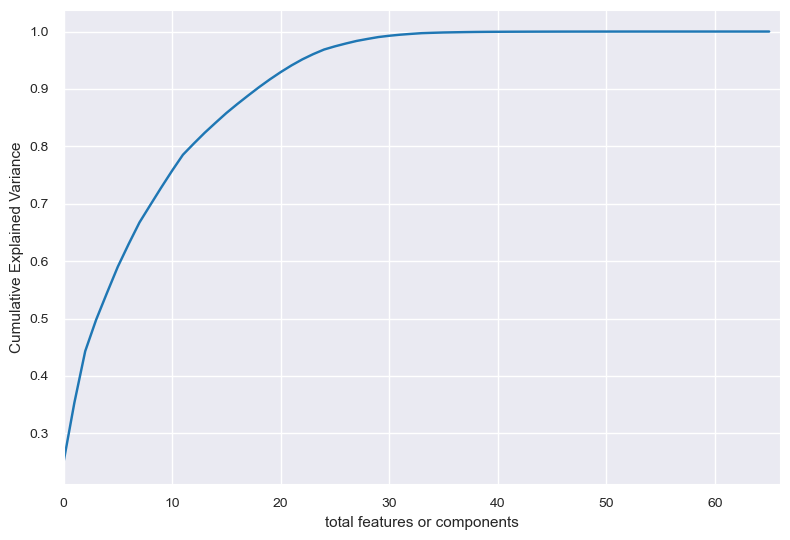

In [80]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_std)
imgPath = "G:\\Brig_Gen_Razzak_Sir_Thesis_Group\\Thesis-on-DDOS-main\\images\\"
imgName = "PCA_Cumulative_explained_variance.png"
with plt.style.context(style="seaborn-notebook"):
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel("total features or components")
    plt.ylabel("Cumulative Explained Variance")
    plt.xlim(0,len(df.columns),1)
    plt.tight_layout()
    plt.savefig(imgPath+imgName)

In [71]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']